In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS


# Load the Mall_Customers dataset
df = pd.read_csv('Mall_Customers.csv')

df.rename(columns={"Genre":"Gender"}, inplace=True) # Rename lại feature

# Display the first few rows and the basic information of the dataset
df_info = df.info()
df_head = df.head()

df_info, df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


(None,
    CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
 0           1    Male   19                  15                      39
 1           2    Male   21                  15                      81
 2           3  Female   20                  16                       6
 3           4  Female   23                  16                      77
 4           5  Female   31                  17                      40)

In [2]:
# Encode the 'Gender' column
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male = 1, Female = 0

# Selecting relevant features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Show the transformed data
pd.DataFrame(X_scaled, columns=['Annual Income (k$)', 'Spending Score (1-100)']).head()

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


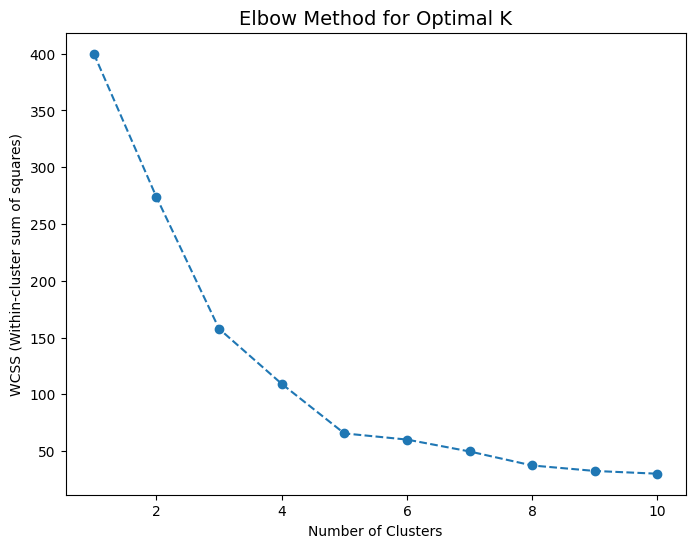

In [3]:
# Determine the optimal number of clusters using the Elbow Method
wcss = []
cluster_range = range(1, 11)
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # Within-cluster sum of squares

# Plot the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K', fontsize=14)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-cluster sum of squares)')
plt.show()

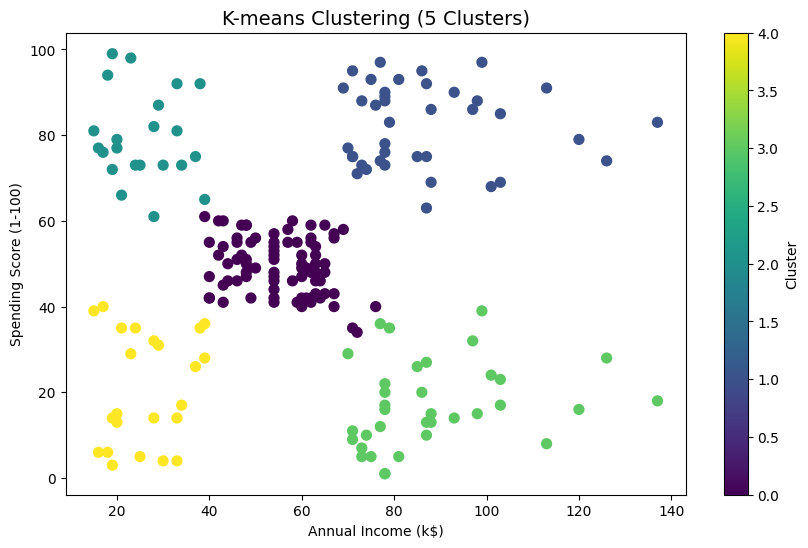

In [7]:
# K-means with 5 clusters
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)  # Thêm nhãn cụm vào DataFrame

# Visualize the clusters using Annual Income and Spending Score
plt.figure(figsize=(10, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['KMeans_Cluster'], cmap='viridis', s=50)
plt.title('K-means Clustering (5 Clusters)', fontsize=14)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(label='Cluster')
plt.show()


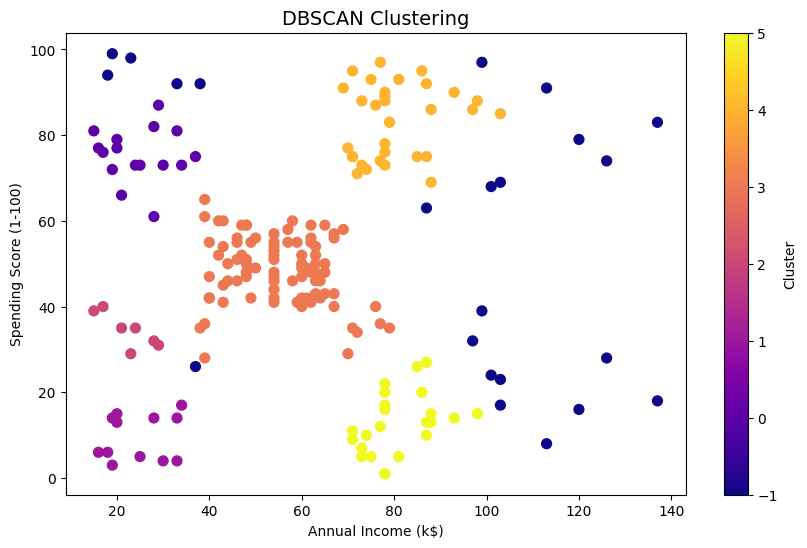

In [5]:
# DBSCAN model
dbscan = DBSCAN(eps=0.35, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

# Visualize DBSCAN clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], 
            c=df['DBSCAN_Cluster'], cmap='plasma', s=50)
plt.title('DBSCAN Clustering', fontsize=14)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')    
plt.colorbar(label='Cluster')
plt.show()

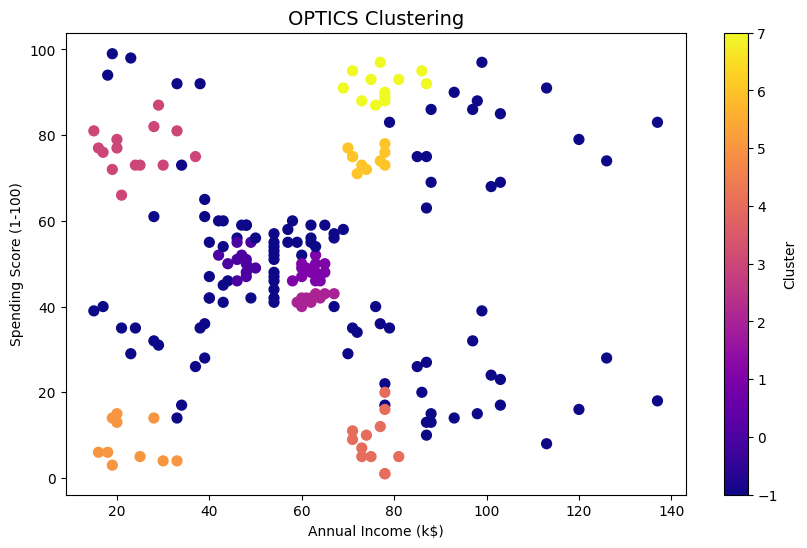

In [6]:
from sklearn.cluster import OPTICS

# OPTICS model
optics = OPTICS(min_samples=6, xi=0.07, min_cluster_size=0.05)  # Xác định các tham số cho OPTICS
df['OPTICS_Cluster'] = optics.fit_predict(X_scaled)  # Thêm nhãn cụm vào DataFrame

# Visualize OPTICS clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], 
            c=df['OPTICS_Cluster'], cmap='plasma', s=50)
plt.title('OPTICS Clustering', fontsize=14)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(label='Cluster')
plt.show()